In [1]:
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import loader, data_generation
from helpers import helpers, plotter
from keras.callbacks import ModelCheckpoint
from inference import infer
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf; import keras

Using TensorFlow backend.


In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = '/Users/omernivron/Downloads/GPT_' + kernel

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D


In [3]:
data = loader.load_data(kernel, size = 1, rewrite = 'False', d = d)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


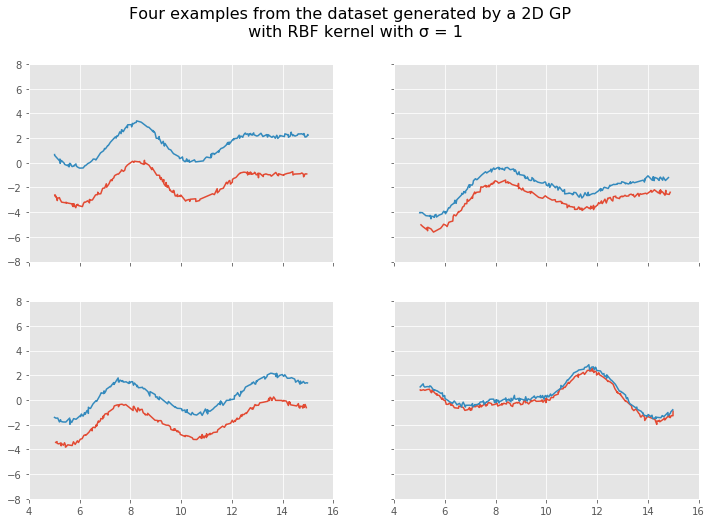

In [4]:
if d:
    plotter.plot_2d_examples(data[1], data[-3], data[-1])
else:
    plotter.plot_examples(data[0], data[4])

In [5]:
run = 1
name_comp = 'run_' + str(run) 
folder = save_dir + '/ckpt/check_' + name_comp; 

In [6]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [7]:
ℯ = 512; l = [256, 256, 64, 32];  heads = 32; context = 50; order = True; consec = True
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context_p = 10, d = d); 

In [8]:
if d:
    decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
else:
    decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads, input_vocab_size = 200); 

In [9]:
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



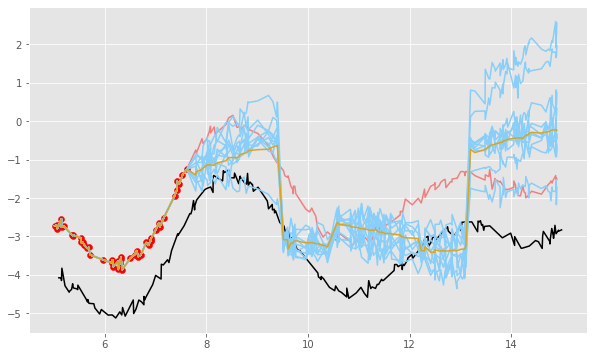

In [10]:
if d:
    idx = int(43)
    plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 10, num_steps = 999, consec = consec, order = order)

else:  
    idx = int(1601)
    plotter.infer_plot(decoder, em = data[2][idx, :], x = data[1][idx, :], y = data[-1][idx, :], num_steps = 150, samples = 100, context_p = context, order = order, consec = consec)

rbf_noise
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample # 0, r squared: -0.22473287352117866
sample # 1, r squared: -2.269100897217485
sample # 2, r squared: 0.23234332118164647
sample # 3, r squared: -1.7567408749737523
sample # 4, r squared: -1.5913654116959535
sample # 5, r squared: -0.7634041980836206
sample # 6, r squared: -2.2612799369779566
sample # 7, r squared: -0.817560022264413
sample # 8, r squared: -6.062771272149021
sample #


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Does not exists

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample # 0, r squared: -1.2199052119535239
sample # 1, r squared: -0.9019162238607079
sample # 2, r squared: -0.4659049800145256
sample # 3, r squared: -1.5407120703755908
sample # 4, r squared: -0.9145542833690172
sample # 5, r squared: -0.30397748410348613
sample # 6, r squared: -0.8172006343015794
sample # 7, r squared: -0.8904290904738119
sample # 8, r squared: -1.334897587977515
sample # 9, r squared: -0.7899082693227921


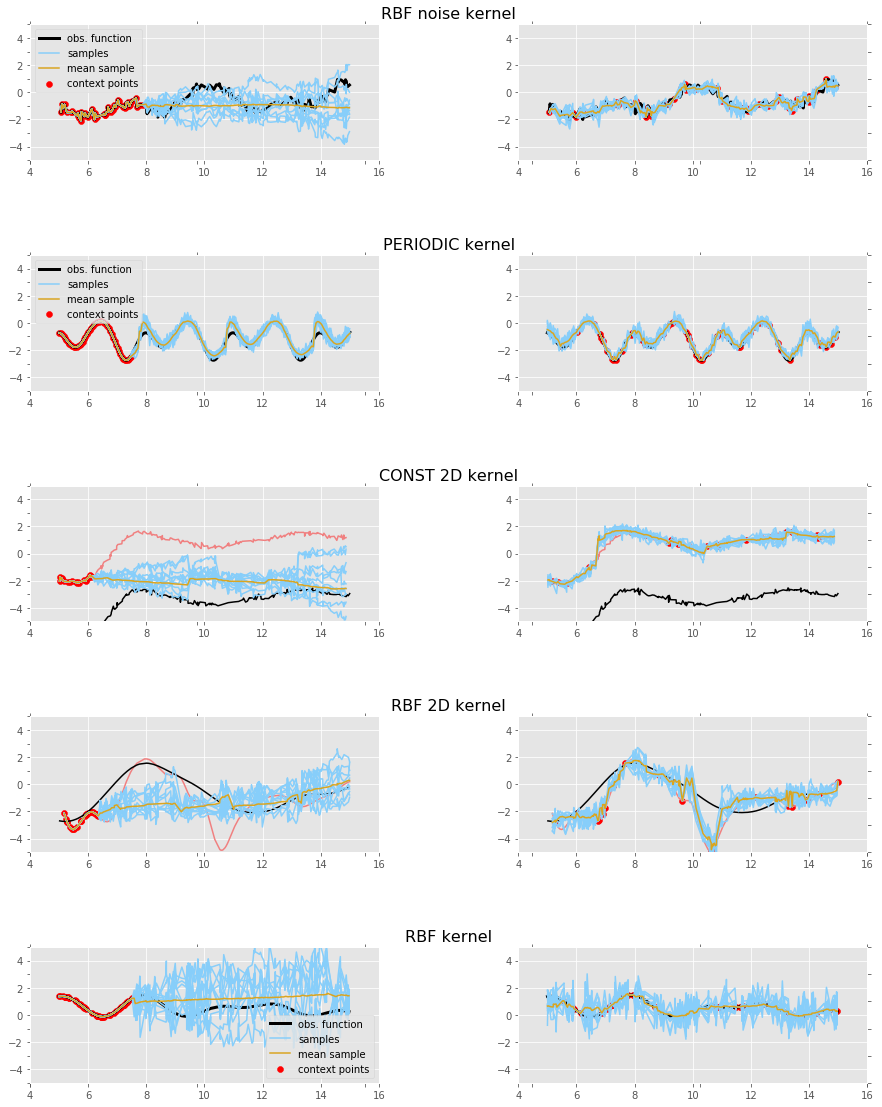

In [4]:
plotter.all_inference(consec = True)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.987) + WhiteKernel(noise_level=0.0516)
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.91) + WhiteKernel(noise_level=0.0523)
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1.09, periodicity=3.02)
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1, periodicity=9.02)
['.DS_Store', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=0.974)
RBF(length_scale=1)
RBF(length_scale=0.991)


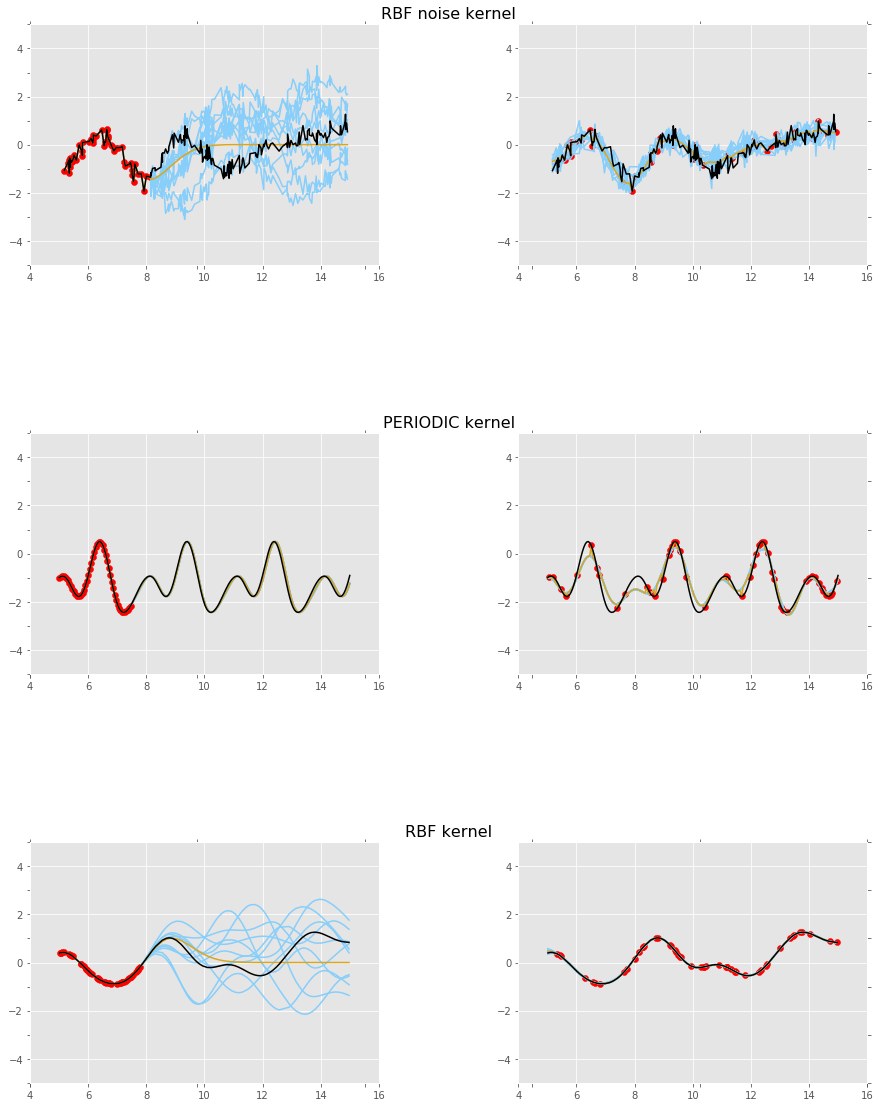

In [3]:
plotter.GP_infer1D()